In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
from rsnn.spike_sequences.sampling import sample_spike_sequences
from rsnn.spike_sequences.utils import get_spiking_check_matrix, get_phi0
from rsnn.spike_sequences.counting import get_cardinality

In [3]:
%matplotlib inline

In [4]:
plt.style.use('scientific')
torch.manual_seed(42);

# Spiking-Check Matrix and Spectral Radius

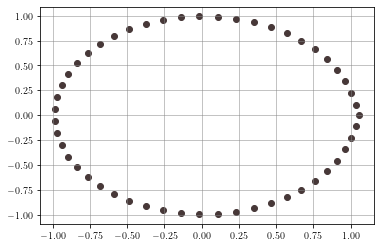

In [5]:
G = get_spiking_check_matrix(50)
phis = torch.linalg.eigvals(G)

_ = plt.scatter(phis.real, phis.imag)

In [14]:
type(get_phi0(50))

float

# Counting

In [17]:
card = get_cardinality(500, 50, approx=False)
approx_card = get_cardinality(500, 50, approx=True)
abs(card - approx_card)/card

0.0025510776622943406

# Sampling

In [19]:
spike_sequences = sample_spike_sequences(10, 2, 10000)

In [20]:
_, counts = spike_sequences.unique(dim=1, return_counts=True)
counts

tensor([209, 198, 249, 195, 221, 210, 210, 223, 193, 198, 231, 217, 254, 235,
        212, 204, 198, 230, 228, 233, 228, 212, 217, 210, 255, 209, 201, 221,
        203, 216, 205, 215, 216, 201, 220, 228, 202, 230, 219, 233, 227, 218,
        227, 202, 223, 214])

# Marginal and Empirical Number of Spikes

In [21]:
spike_sequences = sample_spike_sequences(200, 10, 1000)

In [22]:
spike_sequences.float().mean(), 1/(get_phi0(10)**(11) + 10)

(tensor(0.0608), 0.060876747580960344)

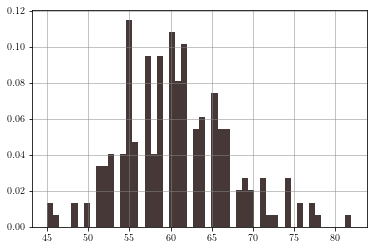

In [27]:
_ = plt.hist(spike_sequences.float().sum(dim=1).numpy(), bins=50, density=True)